# pycocotools 을 이용한 COCO dataset 살펴보기

In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

* Annotation  
2017 Train/Val annotations [241MB] http://images.cocodataset.org/annotations/annotations_trainval2017.zip
* Images
2017 Val images [5K/1GB] http://images.cocodataset.org/zips/val2017.zip

In [2]:
dataDir='annotations_trainval2017'
loc = '{}/annotations/'.format(dataDir)

In [3]:
loc

'annotations_trainval2017/annotations/'

In [4]:
!ls $loc

captions_train2017.json		 person_keypoints_val2017.json
captions_val2017.json		 person_keypoints_val2017_.json
instances_train2017.json	 person_keypoints_val2017_.json.bak
instances_val2017.json		 person_keypoints_val2017_small.json
person_keypoints_train2017.json  person_keypoints_val2017_small2.json


## Annotation - instances

In [5]:
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [6]:
annFile

'annotations_trainval2017/annotations/instances_val2017.json'

In [7]:
#!head $annFile

In [8]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.37s)
creating index...
index created!


In [9]:
coco

### Get img ids that satisfy given filter conditions.

In [10]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','skateboard']);

In [11]:
catIds

[1, 41]

In [12]:
imgIds = coco.getImgIds(catIds=catIds )
print(imgIds)

[161799, 25096, 451084, 84492, 68628, 93717, 362520, 434204, 473118, 125472, 361506, 439854, 500270, 304180, 562229, 576566, 559160, 257084, 324158, 292415, 26690, 373315, 230983, 245320, 424521, 428111, 419408, 458325, 187990, 161879, 72281, 185950, 442463, 132703, 288862, 476258, 119911, 111207, 172649, 150649, 438907, 370813, 558213, 327306, 568981, 176799, 349860, 414385, 278705, 229553, 523957, 157365, 161978, 128699, 187585, 71877, 572620, 426203, 291551, 295138, 431848, 13546, 581357, 279278, 15597, 67310, 121591, 145665, 306437, 535306, 394510, 243989, 404249, 190753, 377635, 481573, 7977, 378673, 358195, 579902, 65350, 492362, 336209, 258388, 270677, 538458, 209757, 261982, 549220, 256868, 122217, 448365, 31093, 171382, 532855, 190841, 253819, 35197, 149375, 455555, 169356, 199055, 146831, 13201, 393115, 263068, 106912, 180135, 396200, 194471, 87476, 563648, 443844, 308165, 581062, 489924, 192964, 108495, 22479, 365521, 476119, 3553, 87038, 450559]


In [13]:
imgIds = coco.getImgIds(imgIds = [imgIds[1]])
print(imgIds)

[25096]


In [14]:
#imgIds = coco.getImgIds(catIds=catIds );
#imgIds = coco.getImgIds(imgIds = [324158])
#img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img = coco.loadImgs(imgIds)[0]

In [15]:
img

{'license': 3,
 'file_name': '000000025096.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000025096.jpg',
 'height': 500,
 'width': 375,
 'date_captured': '2013-11-14 20:20:21',
 'flickr_url': 'http://farm4.staticflickr.com/3214/2507093133_f75be3535a_z.jpg',
 'id': 25096}

In [16]:
img['id']

25096

In [17]:
img['file_name']

'000000025096.jpg'

In [18]:
img['coco_url']

'http://images.cocodataset.org/val2017/000000025096.jpg'

In [19]:
# use url to load image
I = io.imread(img['coco_url'])

### Get ann ids that satisfy given filter conditions.

In [20]:
print('이미지 id가 {} 이고 catIds가 {} 인 정보를 기술하는 주석(annotation)을 기술하는 Id 찾기'.format(img['id'], catIds))

이미지 id가 25096 이고 catIds가 [1, 41] 인 정보를 기술하는 주석(annotation)을 기술하는 Id 찾기


In [21]:
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)

In [22]:
annIds

[511480, 1474353]

In [23]:
anns = coco.loadAnns(annIds)

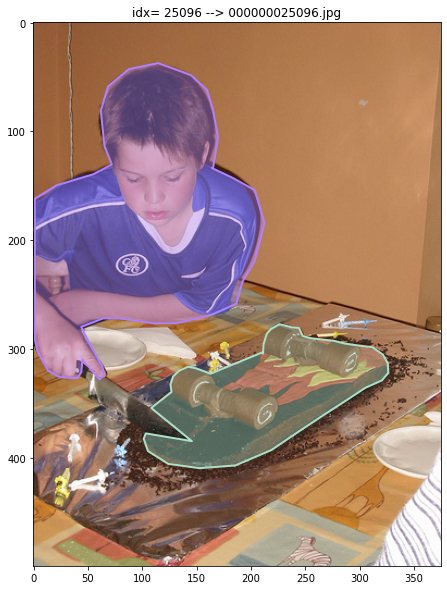

In [24]:
plt.figure()
plt.imshow(I)
plt.title('idx= {} --> {}'.format(img['id'], img['file_name']))
coco.showAnns(anns)

## Annotations - Keypoints

In [25]:
dataDir, dataType

('annotations_trainval2017', 'val2017')

In [26]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
print(annFile)

annotations_trainval2017/annotations/person_keypoints_val2017.json


In [27]:
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.20s)
creating index...
index created!


In [29]:
annIds = coco_kps.getAnnIds(imgIds=img['id'], iscrowd=None)
print(annIds)

[511480]


In [30]:
anns = coco_kps.loadAnns(annIds)

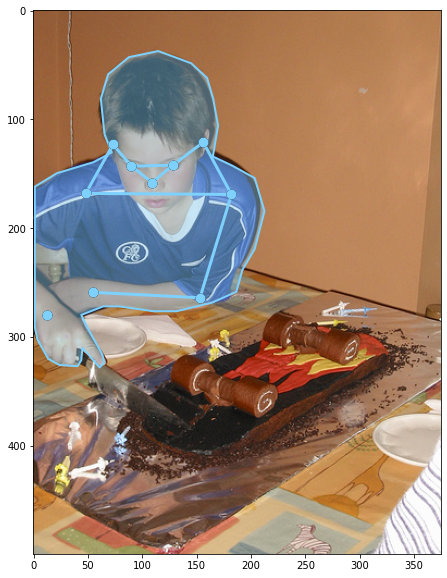

In [31]:
plt.imshow(I)
coco_kps.showAnns(anns)

In [32]:
seg_kf = anns[0]['segmentation']

(-9.442, 222.92200000000003, 22.5295, 342.6405)

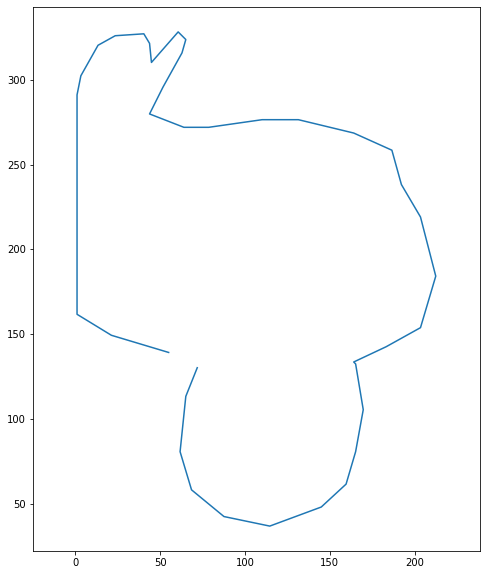

In [33]:
seg_kf_x = seg_kf[0][::2]
seg_kf_y = seg_kf[0][1::2]

plt.plot(seg_kf_x, seg_kf_y)
#plt.plot(seg_x, seg_y, '.')
plt.axis('equal')

In [34]:
kpts = anns[0]['keypoints']

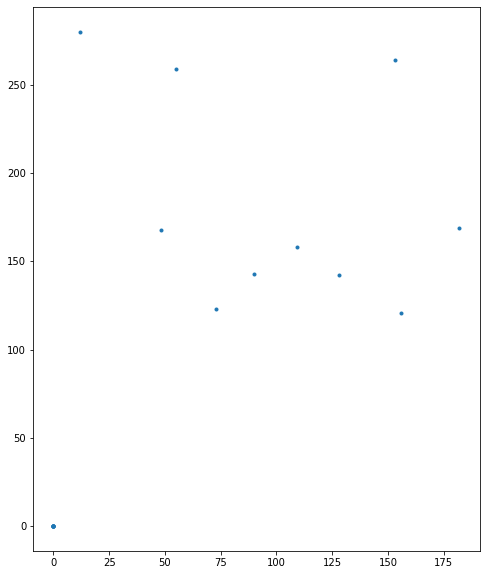

In [35]:
kpts_x = kpts[::3]
kpts_y = kpts[1::3]

plt.plot(kpts_x, kpts_y, '.')

## Annotations - captions

In [36]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
print(annFile)

annotations_trainval2017/annotations/captions_val2017.json


In [37]:
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


In [38]:
annIds = coco_caps.getAnnIds(imgIds=img['id'])

In [39]:
anns = coco_caps.loadAnns(annIds)

In [40]:
anns

[{'image_id': 25096,
  'id': 173604,
  'caption': 'A young boy cuts into a cake shaped like a skateboard.'},
 {'image_id': 25096,
  'id': 182115,
  'caption': 'A young boy cutting a skate board shaped cake.'},
 {'image_id': 25096,
  'id': 189936,
  'caption': 'A boy cutting a cake in the shape of a skateboard.'},
 {'image_id': 25096,
  'id': 195453,
  'caption': 'A boy sitting in front of cake fashioned to look like a skateboard.'},
 {'image_id': 25096,
  'id': 197853,
  'caption': 'A young boy cuts a cake designed to look like a skateboard. '}]

* References
    * https://cocodataset.org/#download
    * https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb